# Based on Kepler's law, for a binary system  with galactic potential

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from vel_fun import init_vel, init_vel_elliptical, period_set, compare_vel
from rk4 import rk4
from eq_sys import two_body_func, barycentric
from rotation_fun import rotation_data
from proj_Z import projection_z_axis, mv_err
from plot_fun import plot_rk4_result, plot_proj_z_result, \
                     plot_mv_err_result, plot_proj_z_vel, plot_vel_compare_result, \
                     plot_orbit_video

Mass unit   : $1.2\cdot 10^{12}$ (Sun mass)  
Length unit : 1 kpc  
Time unit   : $4.3\cdot 10^{15}$ (Years)  
G = 1  

Mass of Galaxy (Milky Way) : $((0.8\text{~}1.5)\cdot 10^{12})$.  
Choose $1\cdot 10^{12}$ (Sun Mass)  

Black Hole (Milky Way)     : $((4.154\pm 0.014)\cdot 10^{6})$.  
Choose $4\cdot 10^{6}$  (Sun Mass)  
  
Argument of pericentre :  $\omega = \frac{\pi}{6}$  
Inclination : $I = \frac{\pi}{4}$  
Longitude of ascending node : $\Omega = \frac{\pi}{6}$


In [2]:
omega = np.pi / 6
I = np.pi / 4
Omega = np.pi / 6

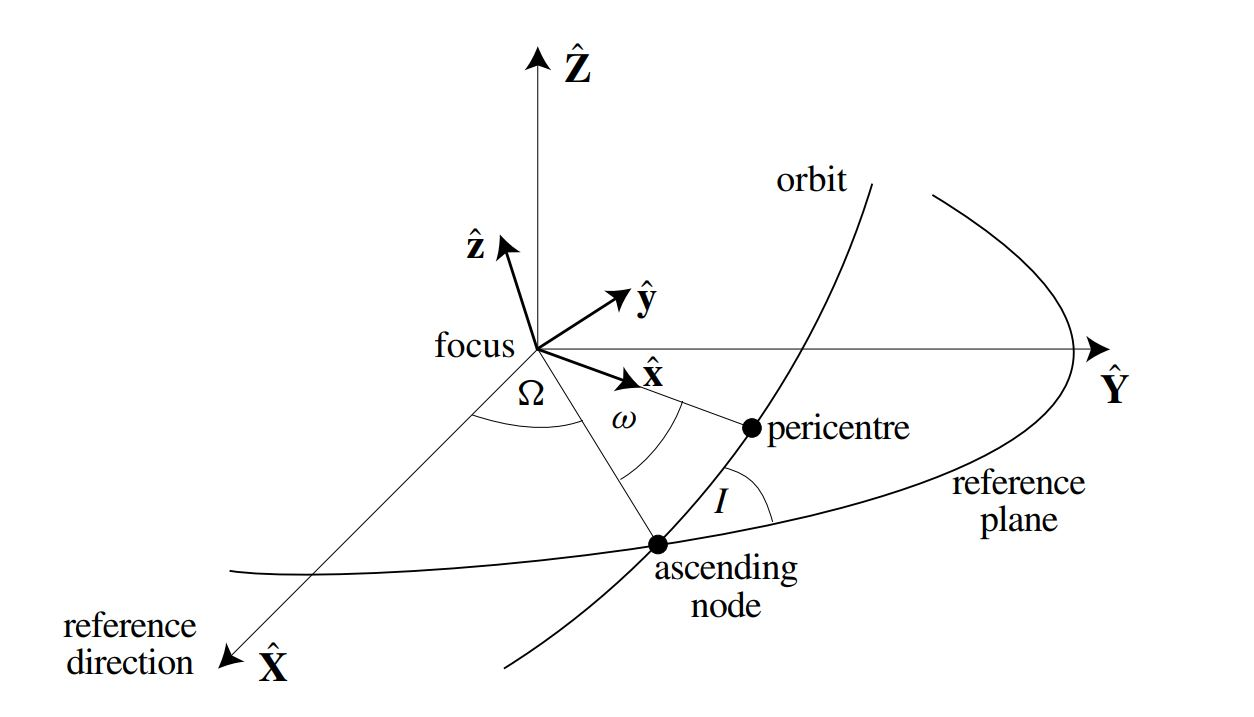

In [3]:
Image(filename='angles.jpg', width=600, height=300)

## 1. Same Distance

In [4]:
# Define the black holes' mass and the galactic mass
m1, m2 = 0.5, 0.5
bh_mass = [m1, m2]
gal_mass = (1e+12 / 4e+6)*0.5

In [5]:
# Define gravitational constant, two black holes distance, and eccentricity
G = 1
R = 0.2
e = 0.85

In [6]:
# Define time and step
time_length = 1000
dt = 0.0005
print(np.format_float_scientific(time_length*dt*4.3e+15), " (years)")

2.15e+15  (years)


In [7]:
# Define the initial velocity
init_v = init_vel(m2, R, G)
init_v = init_vel_elliptical(e, init_v)

In [8]:
# Define the initial values : 
init_array = np.array([R, 0.0, 0.0,
                       0.0, init_v, 0.0])

In [9]:
# RK4 process : 
total_amount = 6  # orbit xyz + vleocity xyz
rk4_result = rk4(two_body_func, barycentric,
                 init_array, total_amount, time_length, dt,
                 bh_mass, gal_mass, G)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1001 [00:00<00:00, 5143.50it/s]

Done !


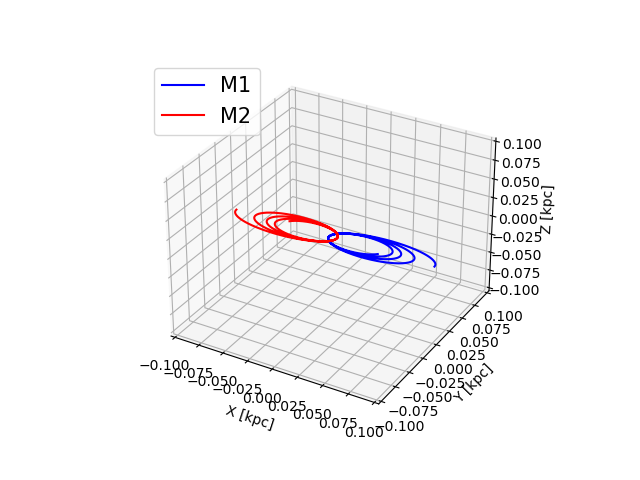

In [10]:
plot_rk4_result(rk4_result, R)

In [11]:
# Rotate the data
rot_data = rotation_data(rk4_result, omega, I, Omega)

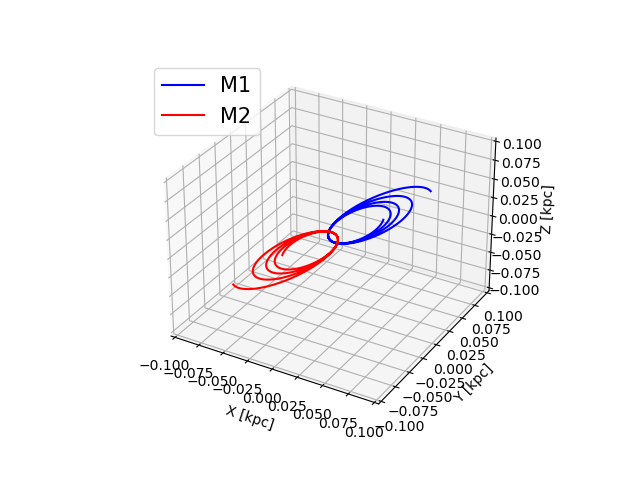

In [12]:
plot_rk4_result(rot_data, R)

### 1-1. Velocity of projection at Z axis

In [13]:
m1_v1, m2_v2, v1_z, v2_z = projection_z_axis(rot_data, bh_mass)

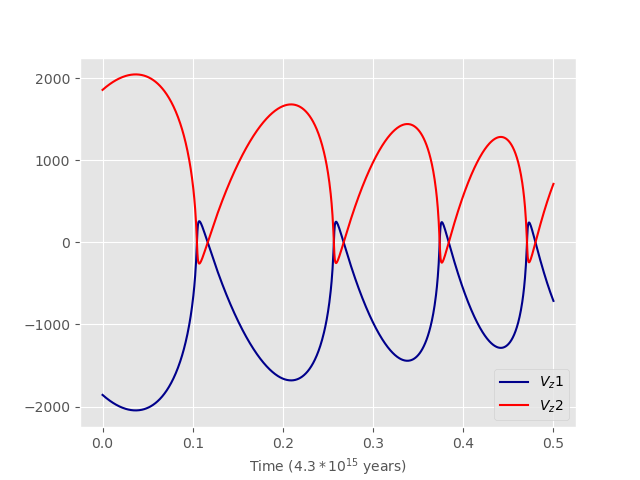

In [14]:
plot_proj_z_vel(v1_z, v2_z, time_length, dt)

### 1-2. $\frac{V_{z}1}{V_{z}2}$

In [15]:
vz1_vz2 = compare_vel(v1_z, v2_z)

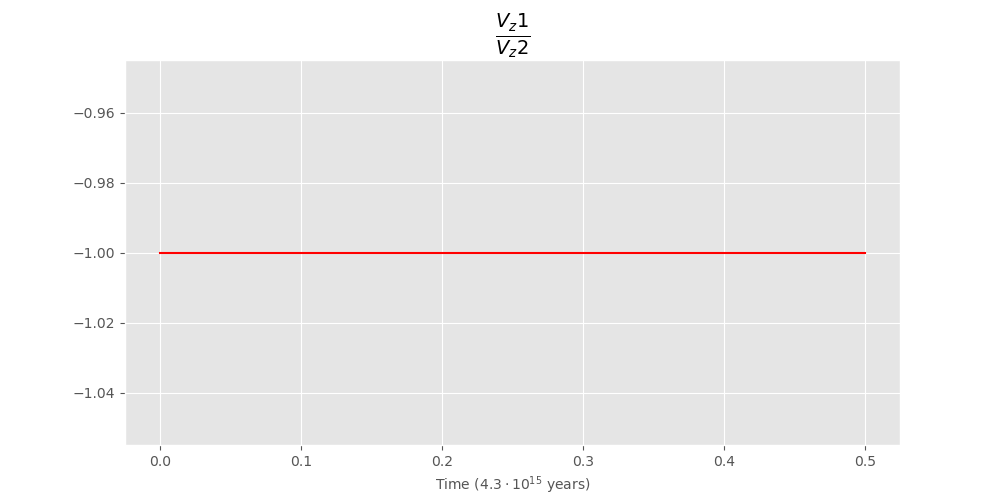

In [16]:
plot_vel_compare_result(vz1_vz2, time_length, dt)

## 2. Different Distance

Original : $r_{1} = \frac{m_{2}}{m_{1} + m_{2}}\cdot R$  
Change distance : $r_{1} = \frac{m_{2} + \epsilon}{m_{1} + m_{2}}\cdot R$

In [17]:
r1_ep1 = [0.0, 0.0]
r1_ep2 = [0.1, 0.0]
r1_ep3 = [0.2, 0.0]
r1_ep4 = [0.3, 0.0]
r1_ep5 = [0.4, 0.0]

In [18]:
init_v = init_vel(m2, R, G)
init_v = init_vel_elliptical(e, init_v)

In [19]:
init_array = np.array([R, 0.0, 0.0,
                       0.0, init_v, 0.0])

In [20]:
rk4_result1 = rk4(two_body_func, barycentric,
                  init_array, total_amount, time_length, dt,
                  bh_mass, gal_mass, G, r1_ep1)

rk4_result2 = rk4(two_body_func, barycentric,
                  init_array, total_amount, time_length, dt,
                  bh_mass, gal_mass, G, r1_ep2)

rk4_result3 = rk4(two_body_func, barycentric,
                  init_array, total_amount, time_length, dt,
                  bh_mass, gal_mass, G, r1_ep3)

rk4_result4 = rk4(two_body_func, barycentric,
                  init_array, total_amount, time_length, dt,
                  bh_mass, gal_mass, G, r1_ep4)

rk4_result5 = rk4(two_body_func, barycentric,
                  init_array, total_amount, time_length, dt,
                  bh_mass, gal_mass, G, r1_ep5)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1001 [00:00<00:00, 5167.71it/s]


Done !


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1001 [00:00<00:00, 5430.64it/s]

Done !



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1001 [00:00<00:00, 5489.39it/s]

Done !



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1001 [00:00<00:00, 5260.57it/s]

Done !



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1001 [00:00<00:00, 5544.45it/s]

Done !


In [21]:
rot_data1 = rotation_data(rk4_result1, omega, I, Omega)
rot_data2 = rotation_data(rk4_result2, omega, I, Omega)
rot_data3 = rotation_data(rk4_result3, omega, I, Omega)
rot_data4 = rotation_data(rk4_result4, omega, I, Omega)
rot_data5 = rotation_data(rk4_result5, omega, I, Omega)

### 2-1. Velocity of projection at Z axis

In [22]:
m1_v1_1, m2_v2_1, v1_z1, v2_z1 = projection_z_axis(rot_data1, bh_mass)
m1_v1_2, m2_v2_2, v1_z2, v2_z2 = projection_z_axis(rot_data2, bh_mass)
m1_v1_3, m2_v2_3, v1_z3, v2_z3 = projection_z_axis(rot_data3, bh_mass)
m1_v1_4, m2_v2_4, v1_z4, v2_z4 = projection_z_axis(rot_data4, bh_mass)
m1_v1_5, m2_v2_5, v1_z5, v2_z5 = projection_z_axis(rot_data5, bh_mass)

### 2-2. $\frac{V_{z}1}{V_{z}2}$

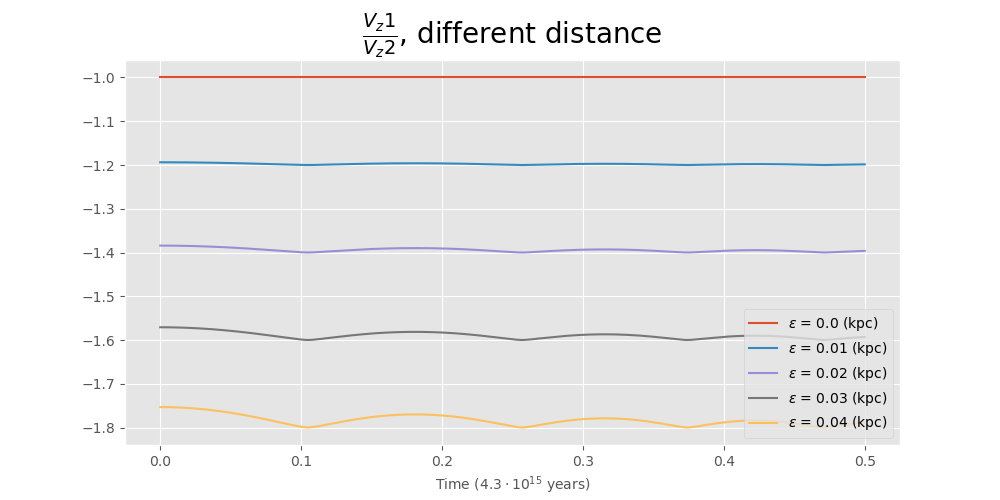

In [23]:
f1_vz1_vz2 = v1_z1 / v2_z1
f2_vz1_vz2 = v1_z2 / v2_z2
f3_vz1_vz2 = v1_z3 / v2_z3
f4_vz1_vz2 = v1_z4 / v2_z4
f5_vz1_vz2 = v1_z5 / v2_z5


total_time = time_length*dt
dt_len = np.linspace(0, total_time, len(f1_vz1_vz2))
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.subplot()
plt.plot(dt_len, f1_vz1_vz2, "-", label=f"$\epsilon$ = {round(r1_ep1[0]*0.1, 4)} (kpc)")
plt.plot(dt_len, f2_vz1_vz2, "-", label=f"$\epsilon$ = {round(r1_ep2[0]*0.1, 4)} (kpc)")
plt.plot(dt_len, f3_vz1_vz2, "-", label=f"$\epsilon$ = {round(r1_ep3[0]*0.1, 4)} (kpc)")
plt.plot(dt_len, f4_vz1_vz2, "-", label=f"$\epsilon$ = {round(r1_ep4[0]*0.1, 4)} (kpc)")
plt.plot(dt_len, f5_vz1_vz2, "-", label=f"$\epsilon$ = {round(r1_ep5[0]*0.1, 4)} (kpc)")
plt.title(r"$\frac{V_{z}1}{V_{z}2}$, different distance", fontsize=20)
plt.xlabel("Time ($4.3\cdot 10^{15}$ years)", fontsize=10)
plt.legend(loc="lower right", fontsize=10)
plt.show()

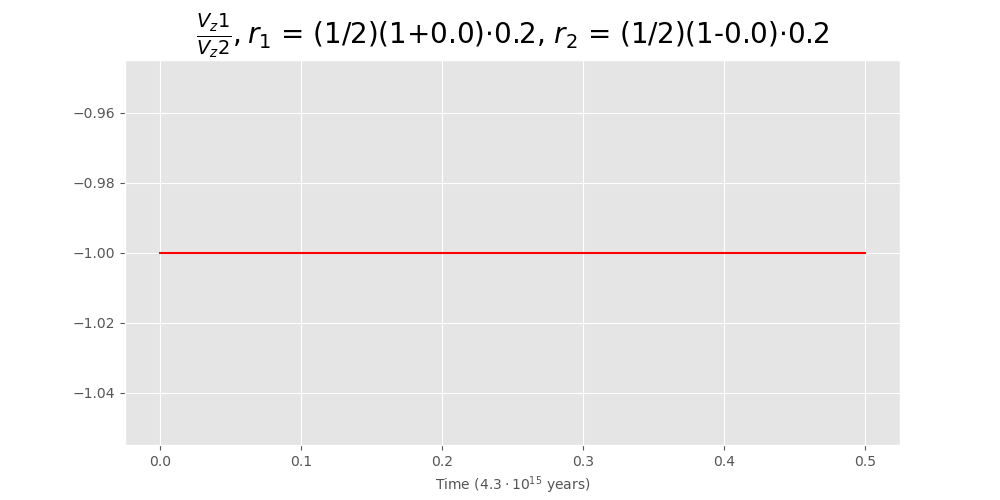

In [24]:
plot_vel_compare_result(f1_vz1_vz2, time_length, dt, title=["r", r1_ep1])

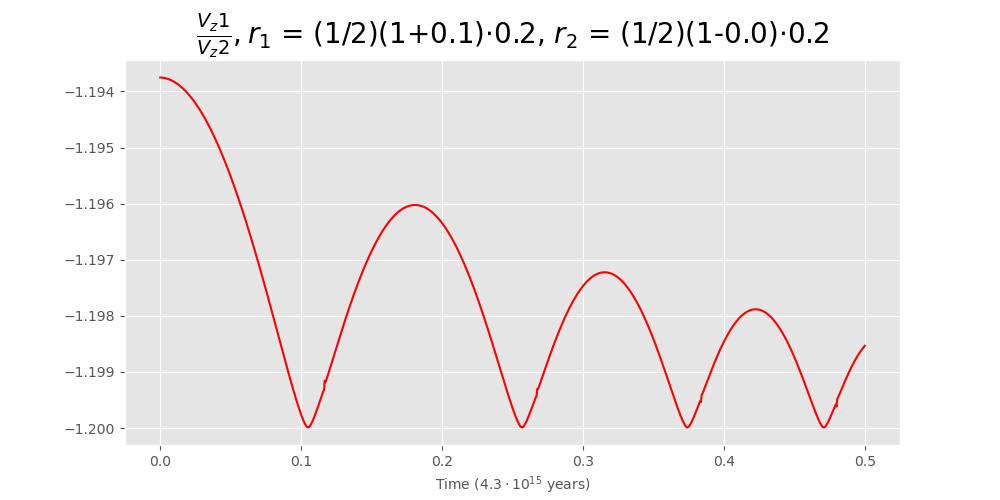

In [25]:
plot_vel_compare_result(f2_vz1_vz2, time_length, dt, title=["r", r1_ep2])

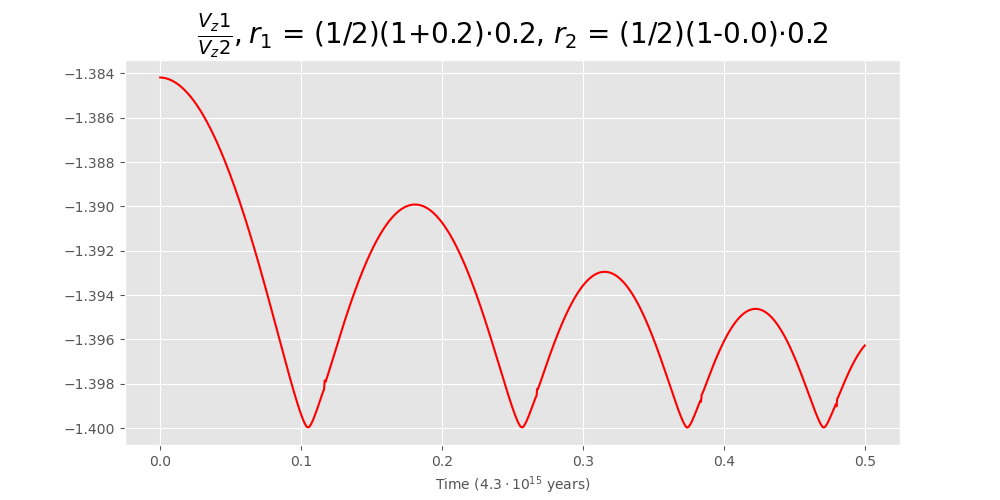

In [26]:
plot_vel_compare_result(f3_vz1_vz2, time_length, dt, title=["r", r1_ep3])

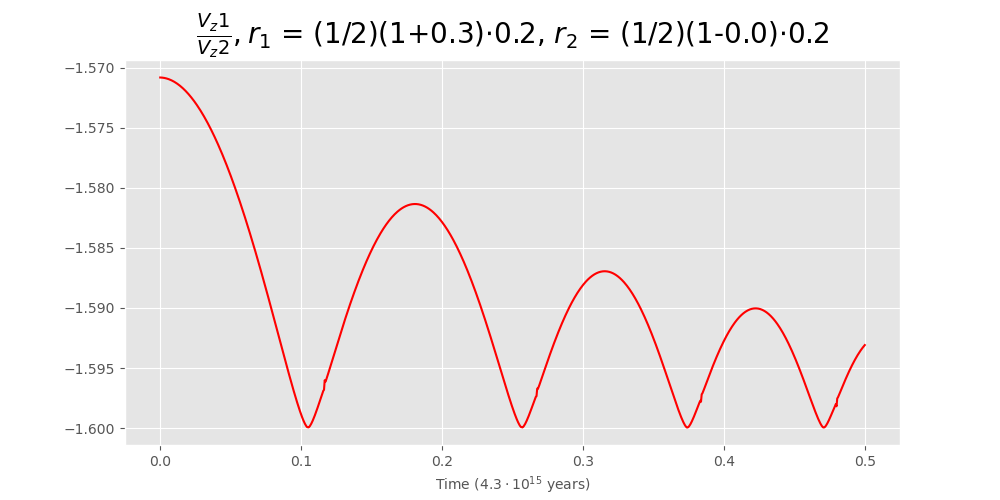

In [27]:
plot_vel_compare_result(f4_vz1_vz2, time_length, dt, title=["r", r1_ep4])

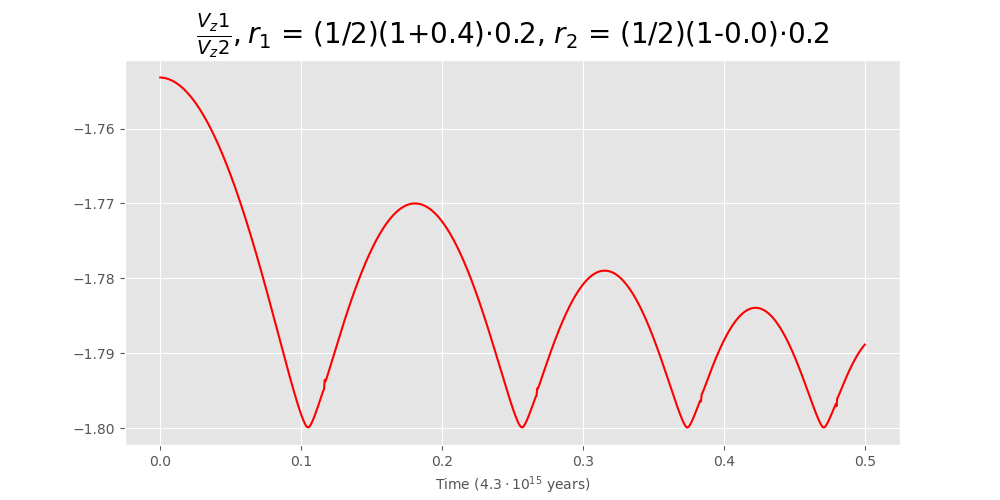

In [28]:
plot_vel_compare_result(f5_vz1_vz2, time_length, dt, title=["r", r1_ep5])

### 2-3. 3D Plot

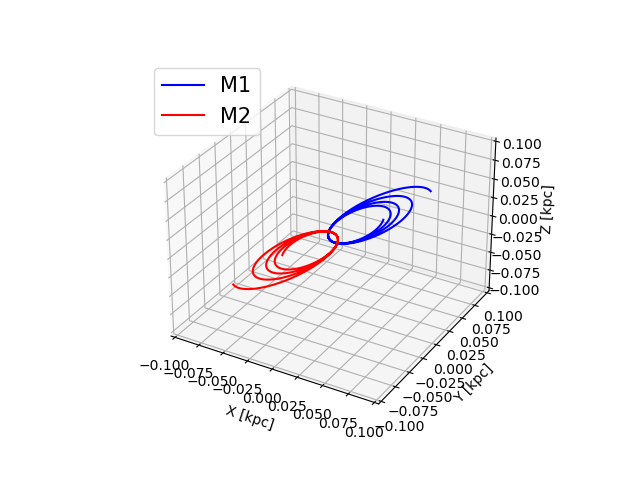

In [29]:
plt.style.use('default')
plot_rk4_result(rot_data1, R)

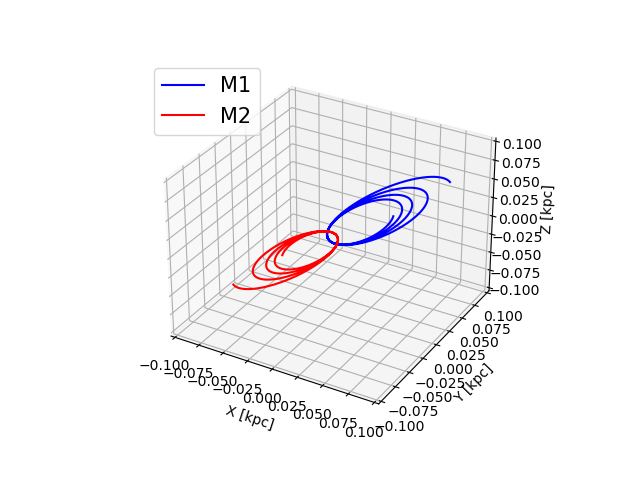

In [30]:
plot_rk4_result(rot_data2, R)

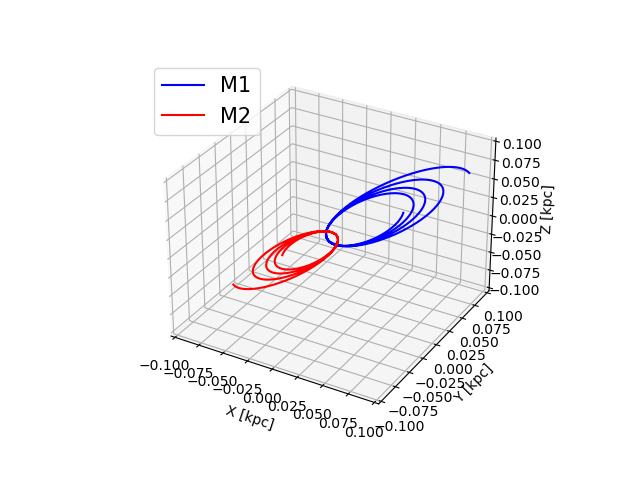

In [31]:
plot_rk4_result(rot_data3, R)

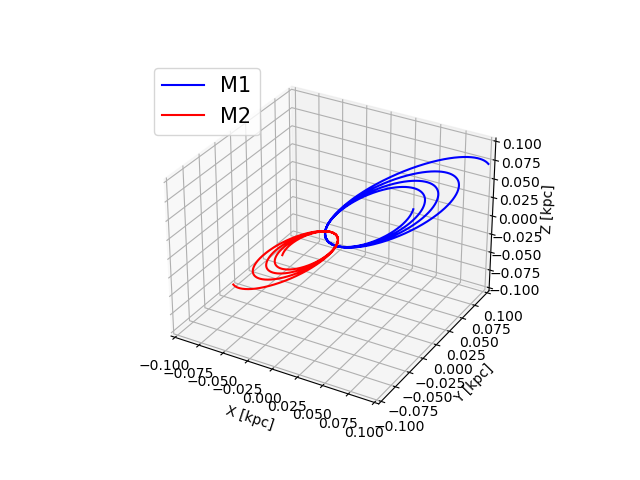

In [32]:
plot_rk4_result(rot_data4, R)

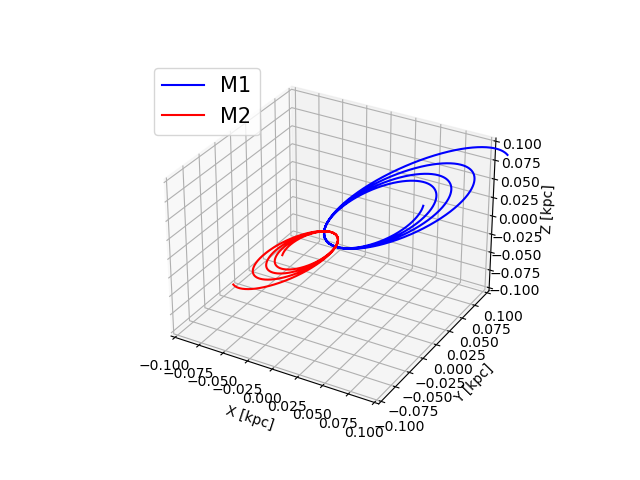

In [33]:
plot_rk4_result(rot_data5, R)